# Bitcoin: A Deflationary Asset with Increasing Demand

## Overview

Bitcoin (BTC) is unique among assets in that it has a fixed supply and a mechanism that reduces the supply over time, making it a deflationary asset. This characteristic contrasts sharply with fiat currencies, where the supply increases over time, leading to inflation. This markdown explains how BTC's supply decreases over time and why this deflationary nature, coupled with growing demand, makes it a valuable asset.

## Key Characteristics of Bitcoin's Supply

1. **Fixed Maximum Supply**: Bitcoin has a maximum supply cap of 21 million coins. This cap is hardcoded into the Bitcoin protocol, ensuring that no more than 21 million BTC will ever be created.
   
2. **Decreasing Issuance Rate**: The issuance rate of new bitcoins is halved approximately every four years in an event known as "halving." This mechanism reduces the rate at which new bitcoins are introduced into circulation.

3. **Lost Coins**: Over time, a certain percentage of bitcoins are lost due to forgotten private keys, accidental loss, or other reasons. This effectively reduces the circulating supply.

## How Coins Can Be Lost

### 1. **Loss of Private Keys**
Bitcoin ownership is determined by private keys. If the private key to a Bitcoin address is lost, the coins at that address cannot be accessed and are effectively removed from circulation. 

- **Example**: An early Bitcoin adopter stored their private keys on a hard drive, which was later discarded by mistake. The hard drive ended up in a landfill, making the Bitcoins inaccessible forever.
  
### 2. **Death Without Passing On Keys**
If a Bitcoin holder dies without passing on their private keys or information on how to access their Bitcoin wallet to heirs or executors, the coins are lost permanently.

- **Example**: A Bitcoin investor with a substantial amount of BTC passes away unexpectedly. Their family is unaware of how to access the digital wallet, leading to a permanent loss of those coins.

### 3. **Forgotten Wallet Passwords**
Some Bitcoin wallets are encrypted with passwords. If the password is forgotten and no backup exists, the wallet cannot be accessed, resulting in the loss of any Bitcoin it contains.

- **Example**: A user sets up a secure Bitcoin wallet with a complex password but fails to record the password anywhere. Years later, the user cannot remember the password and thus cannot access the wallet.

### 4. **Software or Hardware Failure**
Bitcoin wallets can be stored on various devices such as computers, USB drives, or specialized hardware wallets. If these devices fail and there is no backup, the Bitcoin can be lost.

- **Example**: A hardware wallet malfunctions, and the owner did not create a recovery phrase or backup. The Bitcoins stored on the hardware wallet are lost.

### 5. **Sending to Incorrect Addresses**
Bitcoin transactions are irreversible. If Bitcoin is sent to an incorrect or non-existent address, it cannot be retrieved.

- **Example**: An individual intends to transfer Bitcoin to a friend but accidentally enters a wrong address. The Bitcoin is sent to a non-existent or incorrect address, making it irretrievable.

## Estimating Lost Coins

Research indicates that approximately 4% of available bitcoins are lost each year. This decline in Bitcoin supply is expected to result in a maximum of 14 million bitcoins in circulation, which was reached in April 2020. The available supply of bitcoins began to decrease for the first time ever in May 2020, as the rate of irretrievably lost bitcoins exceeded the rate of new bitcoins mined.

## Forecasting Supply

Using the Prophet library, we can forecast Bitcoin's supply over the next 15 years. The forecast considers the fixed maximum supply and the decreasing issuance rate due to halvings.

## Visualizing Supply and Losses

The results of the forecast can be visualized to show both the historical and forecasted supply, as well as the estimated available supply after accounting for lost coins. Key points of interest, such as past and future halving dates, are highlighted to show their impact on the supply.

## Conclusion

Bitcoin's deflationary nature, characterized by its fixed supply and decreasing issuance rate, coupled with the natural loss of coins over time, creates a unique dynamic. This dynamic contrasts with fiat currencies, which typically experience increasing supply and inflation. As demand for Bitcoin continues to grow, its deflationary characteristics may enhance its value as a digital asset.

The irreversible nature of Bitcoin transactions and the necessity of safeguarding private keys emphasize the importance of responsible management of Bitcoin holdings. Proper education and practices around secure storage and backup can mitigate some of the risks associated with losing Bitcoin, preserving its value for future use.

## References

1. ["Man accidentally threw away $127 million in bitcoin and officials won’t allow a search"](https://www.cnbc.com/2017/12/20/man-lost-127-million-worth-of-bitcoins-and-city-wont-let-him-look.html)
2. ["Elon Musk Doesn’t Know Where He Left His Bitcoin"](https://fortune.com/2017/11/28/elon-musk-lost-bitcoin/)
3. ["Billionaire Mathew Mellon’s fortune in Ripple lost"](https://cointhud.com/500-million-ripple-lost-billionaire-mathew-mellon-dies/)
4. ["How to destroy bitcoins?"](https://medium.com/@alcio/how-to-destroy-bitcoins-255bb6f2142e)
5. ["Rise of the Zombie Bitcoins"](https://letstalkbitcoin.com/blog/post/rise-of-the-zombie-bitcoins)
6. ["Exclusive: Nearly 4 Million Bitcoins Lost Forever, New Study Says"](https://fortune.com/2017/11/25/lost-bitcoins/)
7. ["An In-Depth Look at the Economics of Bitcoin"](https://www.cmegroup.com/education/featured-reports/an-in-depth-look-at-the-economics-of-bitcoin.html)
8. ["JP Morgan Is Using the Wrong Valuation Technique on Bitcoin"](https://medium.com/@omid.malekan/jp-morgan-is-using-the-wrong-valuation-technique-on-bitcoin-65413b287763)
9. ["Cane Island - Digital Research, There Will Never Be More Than 14 Million Bitcoins"](https://static1.squarespace.com/static/5d580747908cdc0001e6792d/t/5e98dde5558a587a09fac0cc/1587076583519/research+note+4.17.pdf)


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import sys

sys.path.append("/Users/danieleraimondi/bitcoin_datascience/functions")

from functions_AvailableSupply import (
    forecast_supply,
    lost_coins_estimation,
    final_plot,
    loss_rates_plot,
    coins_lost_percentage,
)

# Load Bitcoin price data
btc_data = pd.read_csv("https://raw.githubusercontent.com/coinmetrics/data/master/csv/btc.csv", parse_dates=["time"])

# 'time' column in datetime format
btc_data["time"] = pd.to_datetime(btc_data["time"])
btc_data["Supply"] = btc_data["CapMrktCurUSD"] / btc_data["PriceUSD"]

In [2]:
forecast = forecast_supply(btc_data, years=15)

15:02:38 - cmdstanpy - INFO - Chain [1] start processing


15:02:44 - cmdstanpy - INFO - Chain [1] done processing


In [3]:
forecast = lost_coins_estimation(btc_data, forecast)

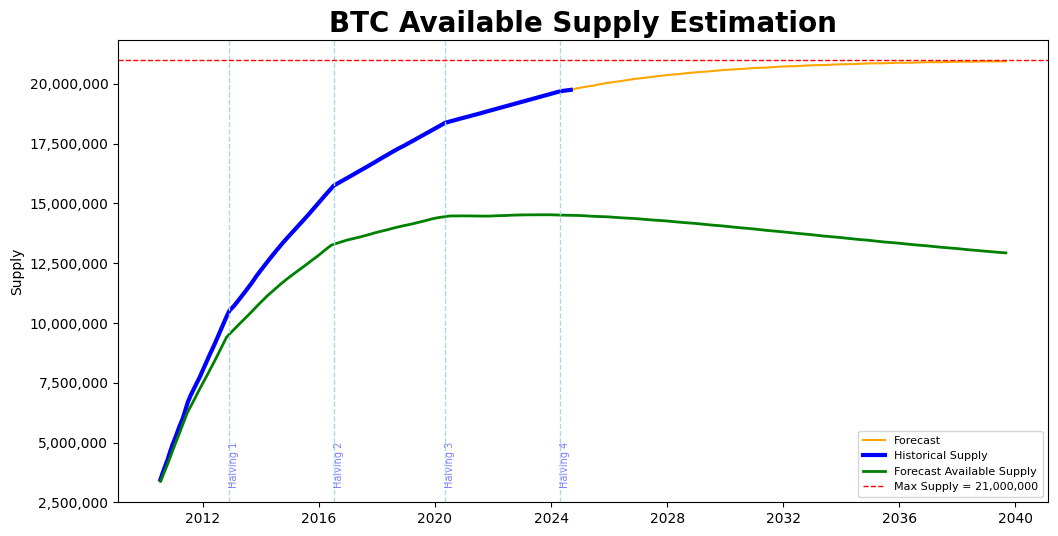

In [4]:
final_plot(btc_data, forecast)

In [5]:
#loss_rates_plot(forecast)

In [6]:
coins_lost_percentage(btc_data, forecast)

'Percentage of coins lost: 26.59 %'